In [585]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
#For formatting date in line chart
import matplotlib.dates as mdates  

In [586]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [115]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)

In [587]:
#Merging two data frames on common city value 
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [588]:
# Get the number of rides for all the cities by using grupby and count function

In [589]:
total_rides =pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [590]:
Total_Drivers=pyber_data_df.groupby(["type"]).sum()["driver_count"]
Total_Drivers

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [591]:
Total_Fares=pyber_data_df.groupby(["type"]).sum()["fare"]
Total_Fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [592]:
# Calculating AVerage fare per driver and average fare per ride

In [593]:
Average_fares_per_driver=pyber_data_df.groupby(["type"]).sum()["fare"] /pyber_data_df.groupby(["type"]).sum()["driver_count"]
Average_fares_per_driver

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [594]:
Average_fares_per_ride=pyber_data_df.groupby(["type"]).sum()["fare"] /pyber_data_df.groupby(["type"]).count()["ride_id"]
Average_fares_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [595]:
city_type= pyber_data_df.set_index(["city"])["type"]
city_type

city
Lake Jonathanshire    Urban
South Michelleport    Urban
Port Samanthamouth    Urban
Rodneyfort            Urban
South Jack            Urban
                      ...  
Michaelberg           Rural
Lake Latoyabury       Rural
North Jaime           Rural
West Heather          Rural
Newtonview            Rural
Name: type, Length: 2375, dtype: object

In [596]:
#Creatinf Final Summary Data frame
Total_summary_df =pd.DataFrame({
     "Total Rides" :total_rides,
     "Total Drivers":Total_Drivers,
    "Total Fares":Total_Fares,
    "Average Fare per Ride" :Average_fares_per_ride,
    "Average Fare per Driver":Average_fares_per_driver
})
#Deleting the index name 
Total_summary_df.index.name=None
Total_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [597]:
# Formatting The Columns 
Total_summary_df["Total Rides"] = Total_summary_df["Total Rides"].map("{:,.0f}".format)
Total_summary_df["Total Drivers"] = Total_summary_df["Total Drivers"].map("{:,.0f}".format)
Total_summary_df["Total Fares"] = Total_summary_df["Total Fares"].map("${:,.2f}".format)
Total_summary_df["Average Fare per Ride"] = Total_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
Total_summary_df["Average Fare per Driver"] = Total_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
Total_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,"8,570","$19,356.33",$30.97,$2.26
Urban,"1,625","59,602","$39,854.38",$24.53,$0.67


In [598]:
#Merging two data frames on common city value 
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [599]:
#Renaming the column name 
pyber_data_df.rename(columns={'city': 'City', 'date': 'Date','fare':'Fare','ride_id':'Ride Id','driver_count':'No. Drivers',
                             'type':'City Type'}, inplace=True)
pyber_data_df

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [600]:
#Setting Index to date column
pyber_data_df["Date"] = pd.to_datetime(pyber_data_df["Date"])
pyber_data_df.set_index("Date")

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [601]:
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
City           2375 non-null object
Date           2375 non-null datetime64[ns]
Fare           2375 non-null float64
Ride Id        2375 non-null int64
No. Drivers    2375 non-null int64
City Type      2375 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 129.9+ KB


In [602]:
#Creating New Data Frame with Copy and LOC
new_data_frame= pyber_data_df.loc[:, ("Date", "City Type", "Fare")].copy()
new_data_frame

,Date,City Type,Fare
0,2019-01-14 10:14:22,Urban,13.83
1,2019-03-04 18:24:09,Urban,30.24
2,2019-02-24 04:29:00,Urban,33.44
3,2019-02-10 23:22:03,Urban,23.44
4,2019-03-06 04:28:35,Urban,34.58
...,...,...,...
2370,2019-04-29 17:04:39,Rural,13.38
2371,2019-01-30 00:05:47,Rural,20.76
2372,2019-02-10 21:03:50,Rural,11.11
2373,2019-05-07 19:22:15,Rural,44.94


In [605]:
#DRop the date column
new_data_frame.drop(["Date"],axis=1)

,City Type,Fare
0,Urban,13.83
1,Urban,30.24
2,Urban,33.44
3,Urban,23.44
4,Urban,34.58
...,...,...
2370,Rural,13.38
2371,Rural,20.76
2372,Rural,11.11
2373,Rural,44.94


In [388]:
#creating Fare dataFrame
#new_data_frame=pyber_data_df[["Date","City Type","Fare"]].copy()
#new_data_frame=pyber_data_df.copy("Date")
#new_data_frame


In [606]:
#Setting Index to date column
new_data_frame.set_index(["Date"])

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


In [607]:
#Changing the date to the datetimefunction
new_data_frame["Date"] = pd.to_datetime(new_data_frame["Date"])
pyber_data_df.set_index("Date")

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [608]:
#Changing index  to datatime data type
new_data_frame.index=pd.to_datetime(new_data_frame.index)

In [609]:
new_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000002374
Data columns (total 3 columns):
Date         2375 non-null datetime64[ns]
City Type    2375 non-null object
Fare         2375 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 74.2+ KB


In [610]:
new_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000002374
Data columns (total 3 columns):
Date         2375 non-null datetime64[ns]
City Type    2375 non-null object
Fare         2375 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 74.2+ KB


In [612]:
#Calculating the sum of fare on city type using group by and sum 
sum_of_fare=new_data_frame.groupby('City Type').sum()["Fare"]
sum_of_fare

City Type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: Fare, dtype: float64

In [613]:
#Converting GroupBy() series to dataframe
sum_of_fare=sum_of_fare.to_frame()
sum_of_fare

,Fare
City Type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [614]:
#Reset the index 
sum_of_fare.reset_index()

,City Type,Fare
0,Rural,4327.93
1,Suburban,19356.33
2,Urban,39854.38


In [615]:
#Pivot Table
Pivot_table=pd.pivot_table(new_data_frame,index='Date',columns=['City Type'])
Pivot_table

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN  21.99
2019-05-08 04:39:49   NaN      NaN  18.45
2019-05-08 07:29:01   NaN      NaN  18.55
2019-05-08 11:38:35   NaN      NaN  19.77
2019-05-08 13:10:18   NaN      NaN  18.04

[2375 rows x 3 columns]

In [616]:
#Using LOC on the pivot table to find range 
Pivot_date_filter=Pivot_table.loc[('2019-01-01'):('2019-04-28')]

Pivot_date_filter

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-04-28 14:28:36   NaN      NaN  11.46
2019-04-28 16:29:16   NaN      NaN  36.42
2019-04-28 17:26:52   NaN      NaN  31.43
2019-04-28 17:38:09   NaN    34.87    NaN
2019-04-28 19:35:03   NaN    16.96    NaN

[2196 rows x 3 columns]

In [617]:
#Using Resample method to sum the data on fares and bucketing it on week basis 
weekly_resampled_data=Pivot_date_filter.resample('W').sum()["Fare"]
weekly_resampled_data

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


<Figure size 432x288 with 0 Axes>

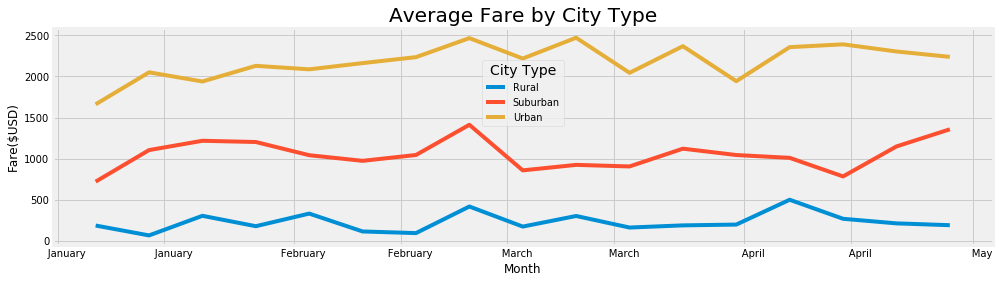

In [618]:
fig = plt.figure()# a new figure window
fig, ax = plt.subplots(figsize=(15, 4))
# Adding  the graph Style Five thirty Eight
plt.style.use('fivethirtyeight') 
#dding Title to the graph
ax.set_title('Average Fare by City Type',loc='center')
#Defining X and Y labes 
ax.set_ylabel('Fare($USD)')
ax.set_xlabel('Month')
#city_data_type=(weekly_resampled_data)
ax.plot(weekly_resampled_data)
#For Formating Dates To the month
monthyearFmt = mdates.DateFormatter('      %B')
ax.xaxis.set_major_formatter(monthyearFmt)
#Defining Legend to the chart 
city_data_type=weekly_resampled_data.columns
ax.legend(city_data_type,loc='center',bbox_to_anchor=(0.5, 0.7),title='City Type',fontsize='x-small')
# Save Figure
fig.savefig("analysis/Fig8.png")

